# Tram de Alicante

<table align="left">
    <td style="border: 0px">
        <a href="https://colab.research.google.com/github/edu9as/alicante/blob/main/projects/transporte/Tram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir En Colab"/></a>
    </td>
</table>

En este notebook, exploraremos los datos disponibles sobre el Tram de Alicante, incluyendo las paradas de Tram y los horarios de los diferentes tramos de las líneas L1, L2, L3 y L4. Utilizaremos técnicas de análisis de datos y visualización para comprender mejor cómo se utiliza el Tram de Alicante y cómo se podría mejorar en el futuro. Este notebook es una pequeña muestra de las posibilidades que los datos pueden ofrecer para el desarrollo de la ciudad de Alicante en el futuro.

Si estás utilizando este notebook desde Google Colab, ejecuta la siguiente celda antes de empezar:

In [ ]:
!git clone https://github.com/edu9as/alicante.git && ln -s /content/alicante/datasets ../../datasets

Comencemos:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = "../../datasets/transporte/tram/"

## Líneas de Tram

La tabla de líneas de Tram es una parte esencial de nuestro conjunto de datos, ya que nos proporciona información básica sobre cada línea, como su número y nombre:

In [2]:
lineas = pd.read_csv(DATA_DIR + "lineas.csv")
lineas

,linea,nombre,color
0,L1,LUCEROS ALACANT-BENIDORM,#DD282B
1,L2,LUCAROS ALACANT-SANT VICENT DEL RASPEIG,#009C4D
2,L3,LUCEROS ALACANT-EL CAMPELLO,#FCC908
3,L4,LUCEROS ALACANT-PL. LA CORUÑA,#C6A7CB


Además, la columna del color de cada línea es especialmente importante para la visualización de datos, ya que nos permitirá distinguir fácilmente entre las diferentes líneas cuando creemos gráficos más adelante.

In [3]:
color = {r.linea: r.color for _,r in lineas.iterrows()}
color

{'L1': '#DD282B', 'L2': '#009C4D', 'L3': '#FCC908', 'L4': '#C6A7CB'}

## Paradas de Tram

La tabla de paradas de Tram es una herramienta valiosa para entender la red de transporte público en Alicante. Contiene información importante sobre el nombre y las coordenadas geográficas de todas las paradas de Tram, así como las líneas de Tram que pasan por cada parada. Con estos datos, podemos visualizar la ubicación de todas las paradas de Tram y la cobertura de las diferentes líneas de Tram en la ciudad. Además, podemos analizar los patrones de uso de cada parada y línea de Tram para entender cómo las personas se mueven por la ciudad. Utilizando estos datos para tomar decisiones informadas sobre la infraestructura del transporte público, podemos mejorar la experiencia de los pasajeros y hacer que la ciudad sea más sostenible y eficiente en el futuro.

In [4]:
paradas = pd.read_csv(DATA_DIR + "paradas.csv")
paradas.head()

,nombre,L1,L2,L3,L4,lon,lat
0,Luceros ALACANT,1,1,1,1,38.345943,-0.490887
1,Mercado,1,1,1,1,38.348325,-0.484750
2,MARQ-Castillo,1,1,1,1,38.352127,-0.475599
3,La Goteta – Plaza Mar 2,0,1,0,0,38.354656,-0.469279
4,Bulevar del Pla,0,1,0,0,38.360022,-0.472328


Vamos a utilizar todas las paradas de Tram para crear un gráfico de puntos que muestre la ubicación de cada parada. Además, vamos a unir las paradas de cada línea con una línea del color correspondiente, según lo especificado en la tabla de líneas de Tram. Esto nos permitirá visualizar fácilmente las diferentes líneas de Tram y su recorrido en la ciudad de Alicante. Este gráfico podría servir para identificar oportunidades para mejorar el sistema de transporte público de la ciudad en el futuro.

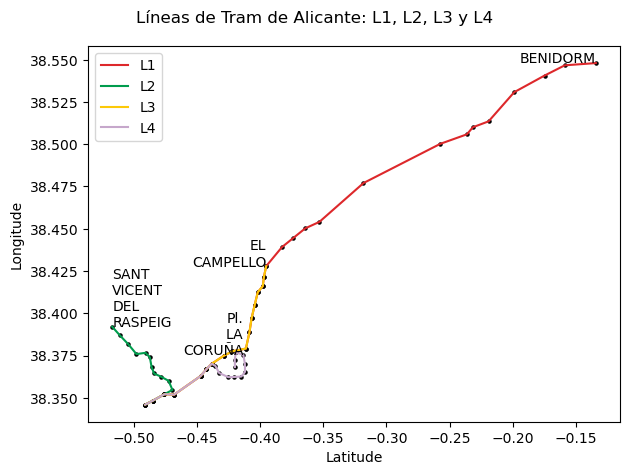

In [5]:
fig,ax = plt.subplots(1,1)

for line in ["L1", "L2", "L3", "L4"]:
    df_ = paradas[paradas[line]== 1]
    df_.plot.scatter("lat", "lon", c="#000", ax = ax, s= 5)
    df_.plot("lat", "lon", ax = ax, c = color[line], label = line)

for name in ["BENIDORM", "SANT VICENT DEL RASPEIG", "EL CAMPELLO", "Pl. LA CORUÑA"]:
    parada = paradas[paradas.nombre == name].iloc[0]
    ax.text(parada.lat, parada.lon, "\n".join(parada.nombre.split()), ha = "left" if parada.lat < -0.45 else "right")

ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")

fig.suptitle("Líneas de Tram de Alicante: L1, L2, L3 y L4")
fig.tight_layout()
plt.show()

## Horarios del Tram

Las tablas de horarios del Tram son una herramienta esencial para entender la frecuencia y el horario de cada línea de Tram en Alicante. Cada tabla tiene una columna para cada parada y cada fila representa un viaje del Tram. Esta información nos permite:

* Analizar los patrones de uso de cada línea de Tram y comprender cuándo y cómo se utilizan más frecuentemente.
* Utilizar estos datos para mejorar la planificación de los horarios de los servicios de Tram en la ciudad y asegurarnos de que se ajusten a las necesidades de los pasajeros.
* Aplicar esta información para prever las horas punta y hacer ajustes en consecuencia.

En general, las tablas de horarios del Tram son un recurso valioso para mejorar la eficiencia y la comodidad del transporte público en Alicante.

In [6]:
horarios_l4_ida = pd.read_csv(DATA_DIR + "l4_ida.csv")
horarios_l4_ida

,Luceros ALACANT,Mercado,MARQ-Castillo,Sangueta,La Isleta,Albufereta,Lucentum,Miriam Blasco,Sergio Cardell,Tridente,Av. Naciones,Cabo Huertas,Av. Benidorm,Londres,Pl. LA CORUÑA
0,05:59,06:01,06:03,06:06,06:10,06:11,06:13,06:14,06:16,06:18,06:20,06:22,06:24,06:26,06:28
1,06:29,06:31,06:33,06:36,06:40,06:41,06:43,06:44,06:46,06:48,06:50,06:52,06:54,06:56,06:58
2,06:59,07:01,07:03,07:06,07:10,07:11,07:13,07:14,07:16,07:18,07:20,07:22,07:24,07:26,07:28
3,07:29,07:31,07:33,07:36,07:40,07:41,07:43,07:44,07:46,07:48,07:50,07:52,07:54,07:56,07:58
4,07:59,08:01,08:03,08:06,08:10,08:11,08:13,08:14,08:16,08:18,08:20,08:22,08:24,08:26,08:28
5,08:29,08:31,08:33,08:36,08:40,08:41,08:43,08:44,08:46,08:48,08:50,08:52,08:54,08:56,08:58
6,08:59,09:01,09:03,09:06,09:10,09:11,09:13,09:14,09:16,09:18,09:20,09:22,09:24,09:26,09:28
7,09:29,09:31,09:33,09:36,09:40,09:41,09:43,09:44,09:46,09:48,09:50,09:52,09:54,09:56,09:58
8,09:59,10:01,10:03,10:06,10:10,10:11,10:13,10:14,10:16,10:18,10:20,10:22,10:24,10:26,10:28
9,10:29,10:31,10:33,10:36,10:40,10:41,10:43,10:44,10:46,10:48,10:50,10:52,10:54,10:56,10:58


## Conclusión

En este notebook se ha presentado una recopilación de datos sobre el sistema de Tram en Alicante, que incluye información sobre las paradas, las líneas y los horarios de los servicios de Tram. A través del análisis de estos datos, hemos explorado los patrones de uso de las diferentes líneas de Tram y las paradas más populares. También hemos utilizado la información para visualizar las rutas de las diferentes líneas y comprender mejor cómo se conectan diferentes áreas de la ciudad.

Es importante aclarar que estos datos recopilados sobre el Tram de Alicante no tienen la intención de reemplazar las aplicaciones y sitios web existentes que proporcionan información en tiempo real sobre los horarios de los servicios de Tram. Estas aplicaciones y sitios web son herramientas valiosas para los pasajeros y están diseñadas específicamente para proporcionar información actualizada y precisa sobre los horarios de los servicios de Tram. Sin embargo, la recopilación y organización de estos datos en una tabla accesible permite que cualquier persona interesada en analizar o visualizar los patrones de uso del Tram pueda hacerlo sin tener que recopilar manualmente la información. Estos datos se proporcionan como una herramienta adicional para ayudar a los investigadores y desarrolladores a comprender mejor el funcionamiento del sistema de transporte público de Alicante y a crear proyectos innovadores y útiles para la ciudad.